In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

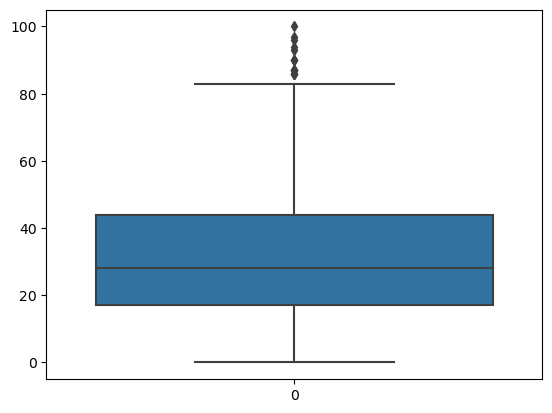

In [5]:
sns.boxplot(df['placement_exam_marks'])

In [6]:
# finding the IQR

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile75

44.0

In [7]:
iqr = percentile75 - percentile25

In [8]:
iqr

27.0

In [9]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [10]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 84.5
lower_limit -23.5


In [12]:
# finding outliers

df[df['placement_exam_marks']>upper_limit]


,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [13]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# trimming

In [14]:
new_df = df[df['placement_exam_marks']<upper_limit]
new_df.shape

(985, 3)

C:\Users\abc\AppData\Local\Temp\ipykernel_4872\2575590867.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\abc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abc\AppData\Local\Temp\ipykernel_4872\2575590867.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flex

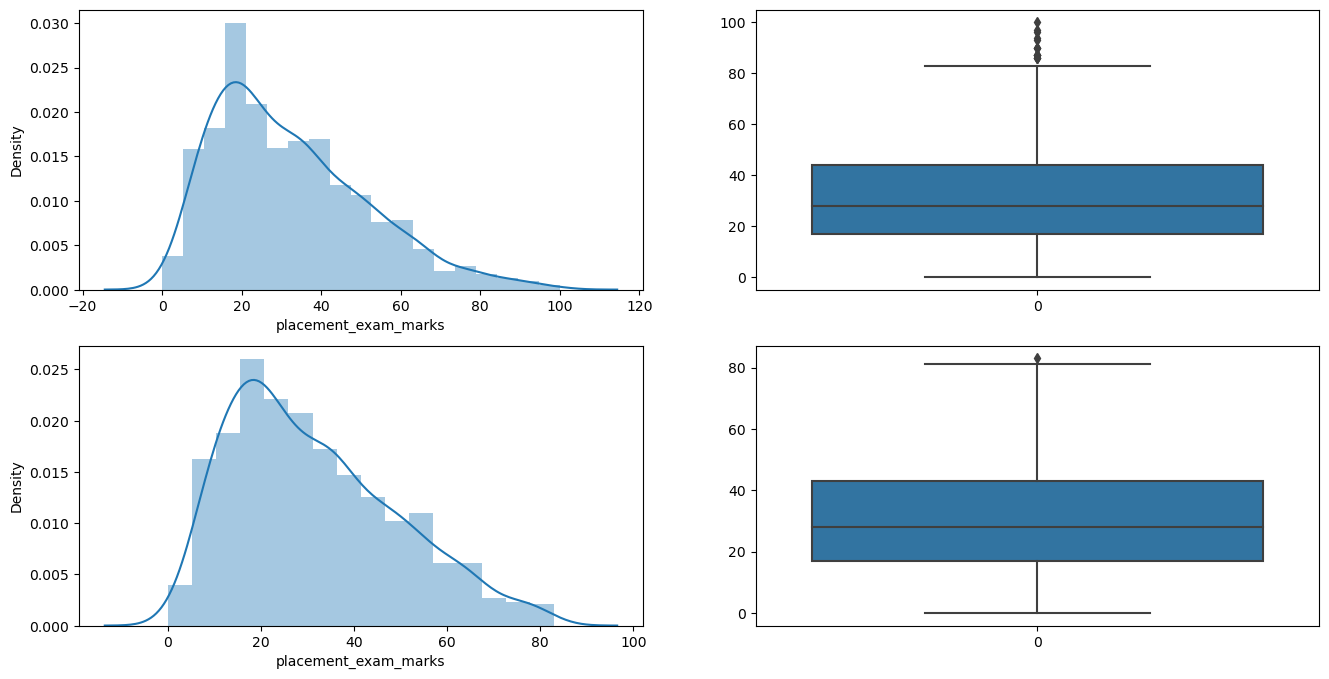

In [15]:
#comparing
plt.figure(figsize = (16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# capping

In [16]:
new_df_cap = df.copy()

In [21]:
new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks']>upper_limit, upper_limit,
                                             np.where(new_df_cap['placement_exam_marks']<lower_limit, lower_limit,
                                                     new_df_cap['placement_exam_marks']))

In [22]:
new_df_cap.shape

(1000, 3)